📊 Customer Segmentation Using RFM Analysis with K-Means Clustering",
    Tools: Python, Pandas, Matplotlib, Seaborn, Scikit-learn"

Step 1: Import Libraries & Load Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime

In [6]:
df = pd.read_csv("F:\\online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Step 2: Clean the Data

In [7]:
df.dropna(subset=['Customer ID'], inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]
df['TotalPrice'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


Step 3: Create RFM Metrics

In [26]:
import datetime

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set reference date
now = datetime.datetime(2011, 12, 10)

# Optional: create TotalPrice if not present
# df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Aggregate RFM features
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Display
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,12,77556.46
1,12347.0,2,8,5633.32
2,12348.0,75,5,2019.40
3,12349.0,18,4,4428.69
4,12350.0,310,1,334.40


Step 4: Normalize the RFM Features

In [29]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

 Step 5: Find Optimal Clusters (Elbow Method)

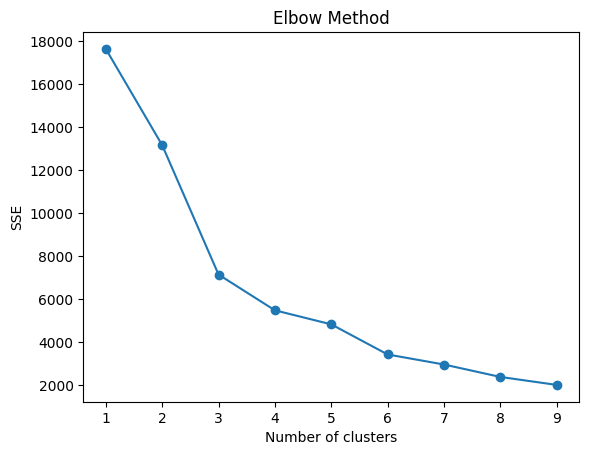

In [30]:
sse = []
for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(rfm_scaled)
        sse.append(kmeans.inertia_)
    
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

Step 6: Apply KMeans Clustering (Assume k=4)

In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,12,77556.46,1
1,12347.0,2,8,5633.32,1
2,12348.0,75,5,2019.40,1
3,12349.0,18,4,4428.69,1
4,12350.0,310,1,334.40,0


Step 7: Analyze and Visualize Clusters

           CustomerID     Recency   Frequency       Monetary
Cluster                                                     
0        15339.302441  461.651221    2.212755     765.377939
1        15303.545928   65.996877    7.494926    3132.376644
2        15121.461538   20.538462  131.884615  116621.847769
3        16374.000000    0.500000  148.000000  568712.085000


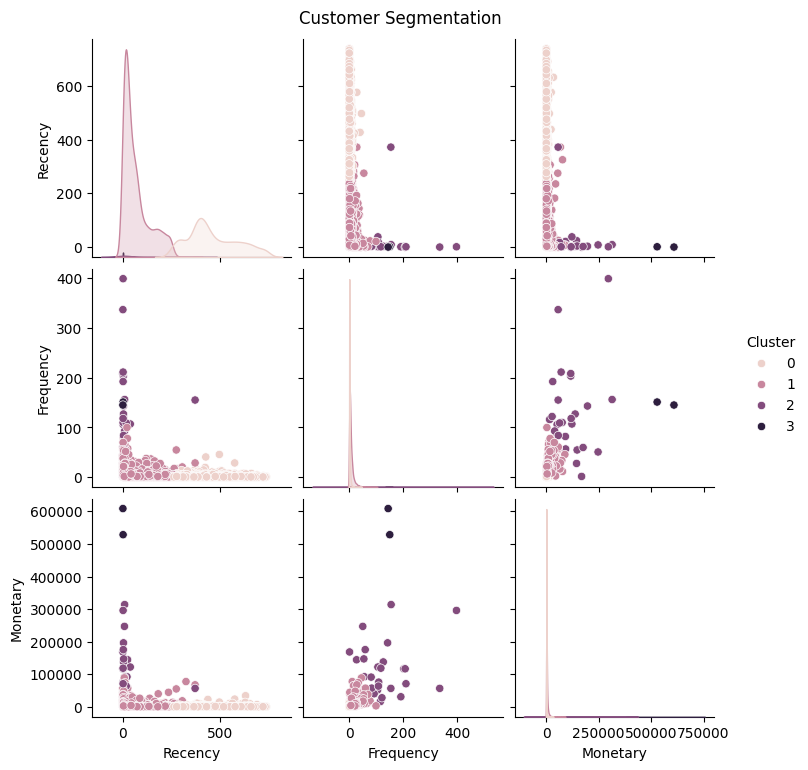

In [32]:
# Cluster summary
print(rfm.groupby('Cluster').mean())

# Pairplot
sns.pairplot(rfm, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'])
plt.suptitle('Customer Segmentation', y=1.02)
plt.show()

 Step 8: Export Final Data (Optional)































 

In [33]:
# Save clustered data
rfm.to_csv("rfm_customer_segments.csv", index=False)